4. Implementation of Market Basket Analysis.

In [9]:
import warnings
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the dataset
df = pd.read_csv('data/Groceries data.csv')

# Display the first few rows of the dataset
print(df.head())


   Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4


In [10]:
# Grouping by Member_number to create a list of items purchased
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Display the list of transactions
print(transactions)


[['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack'], ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns'], ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables'], ['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns'], ['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'whole milk', 'other vegetables', 'hygiene articles', 'whole milk', 'whole milk', 'frozen fish', 'red/blush wine', 'chocolate', 'shopping bags', 'dish cleaner', 'packaged fruit/vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags', 'chocolate', 'pastry'], ['whipped/sour cream', 'rolls/buns', 'margarine', 'rol

In [11]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the list of transactions into a one-hot encoded DataFrame
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(onehot, columns=encoder.columns_)

# Display the one-hot encoded DataFrame
print(df_onehot.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [12]:
from mlxtend.frequent_patterns import apriori

# Apply the Apriori algorithm with a minimum support of 0.01
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
        support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (whipped/sour cream, whole milk, soda, yogurt)
3012  0.010518  (bottled water, rolls/buns, other vegetables, ...
3013  0.013597  (sausage, rolls/buns, other vegetables, whole ...
3014  0.010005  (rolls/buns, shopping bags, other vegetables, ...
3015  0.013597  (rolls/buns, other vegetables, whole milk, sod...

[3016 rows x 2 columns]


In [13]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the generated rules
print("Association Rules:\n", rules)

Association Rules:
                                             antecedents         consequents  \
0                                            (UHT-milk)        (whole milk)   
1                                                (beef)        (whole milk)   
2                                        (bottled beer)        (whole milk)   
3                                       (bottled water)        (whole milk)   
4                                         (brown bread)        (whole milk)   
...                                                 ...                 ...   
1112  (rolls/buns, shopping bags, other vegetables, ...        (whole milk)   
1113    (rolls/buns, shopping bags, whole milk, yogurt)  (other vegetables)   
1114  (shopping bags, other vegetables, whole milk, ...        (rolls/buns)   
1115       (rolls/buns, other vegetables, soda, yogurt)        (whole milk)   
1116             (rolls/buns, whole milk, soda, yogurt)  (other vegetables)   

      antecedent support  conse

In [14]:
# Sort rules by lift
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Display the sorted rules
print("Sorted Association Rules:\n", rules_sorted)


Sorted Association Rules:
                                             antecedents   consequents  \
1078              (rolls/buns, sausage, tropical fruit)      (yogurt)   
900                         (curd, whole milk, sausage)      (yogurt)   
1108  (rolls/buns, other vegetables, whole milk, sau...      (yogurt)   
410                               (domestic eggs, meat)  (whole milk)   
272                               (coffee, canned beer)        (soda)   
...                                                 ...           ...   
517                    (long life bakery product, soda)  (whole milk)   
197                               (pork, bottled water)  (whole milk)   
126                                   (soda, beverages)  (whole milk)   
629                                      (pastry, soda)  (whole milk)   
285                                 (pork, canned beer)  (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
1078            

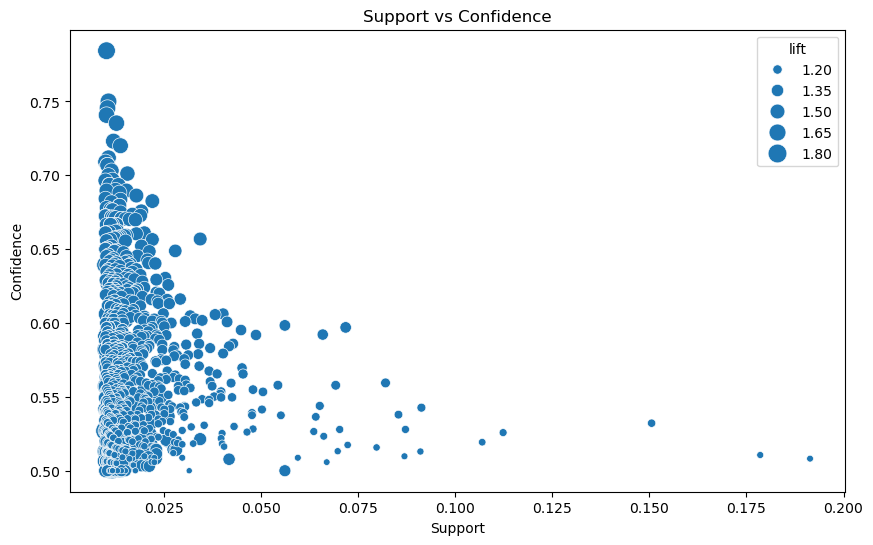

In [15]:
# Plotting support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(20, 200), data=rules_sorted)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()